This project involves the use of K-means clustering, for performing customer segmentation based on purchasing behavior 

Step 1 Data Preparation

In [1]:
import pandas as pd
df =  pd.read_excel("Online Retail.xlsx")# data reading
df.shape# The dataset comprises 541,909 rows and 8 columns.

(541909, 8)

In [2]:
df # exploring the dataset 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [3]:
df.info()#he dataset includes various types of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.describe() #The Quantity and Price columns contain negative values.

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


 Handling missing values:
We can see the presence of NA in the Customer ID 

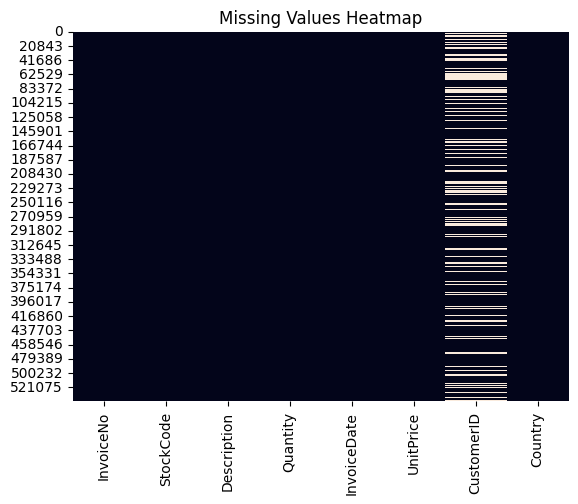

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [6]:
df.isnull().sum()# also the Description contains NA

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

 Excluding rows with missing values

In [7]:
# now the data is free form NA
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
# Removing negative values from the Quantity and Price
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


Checking outliers

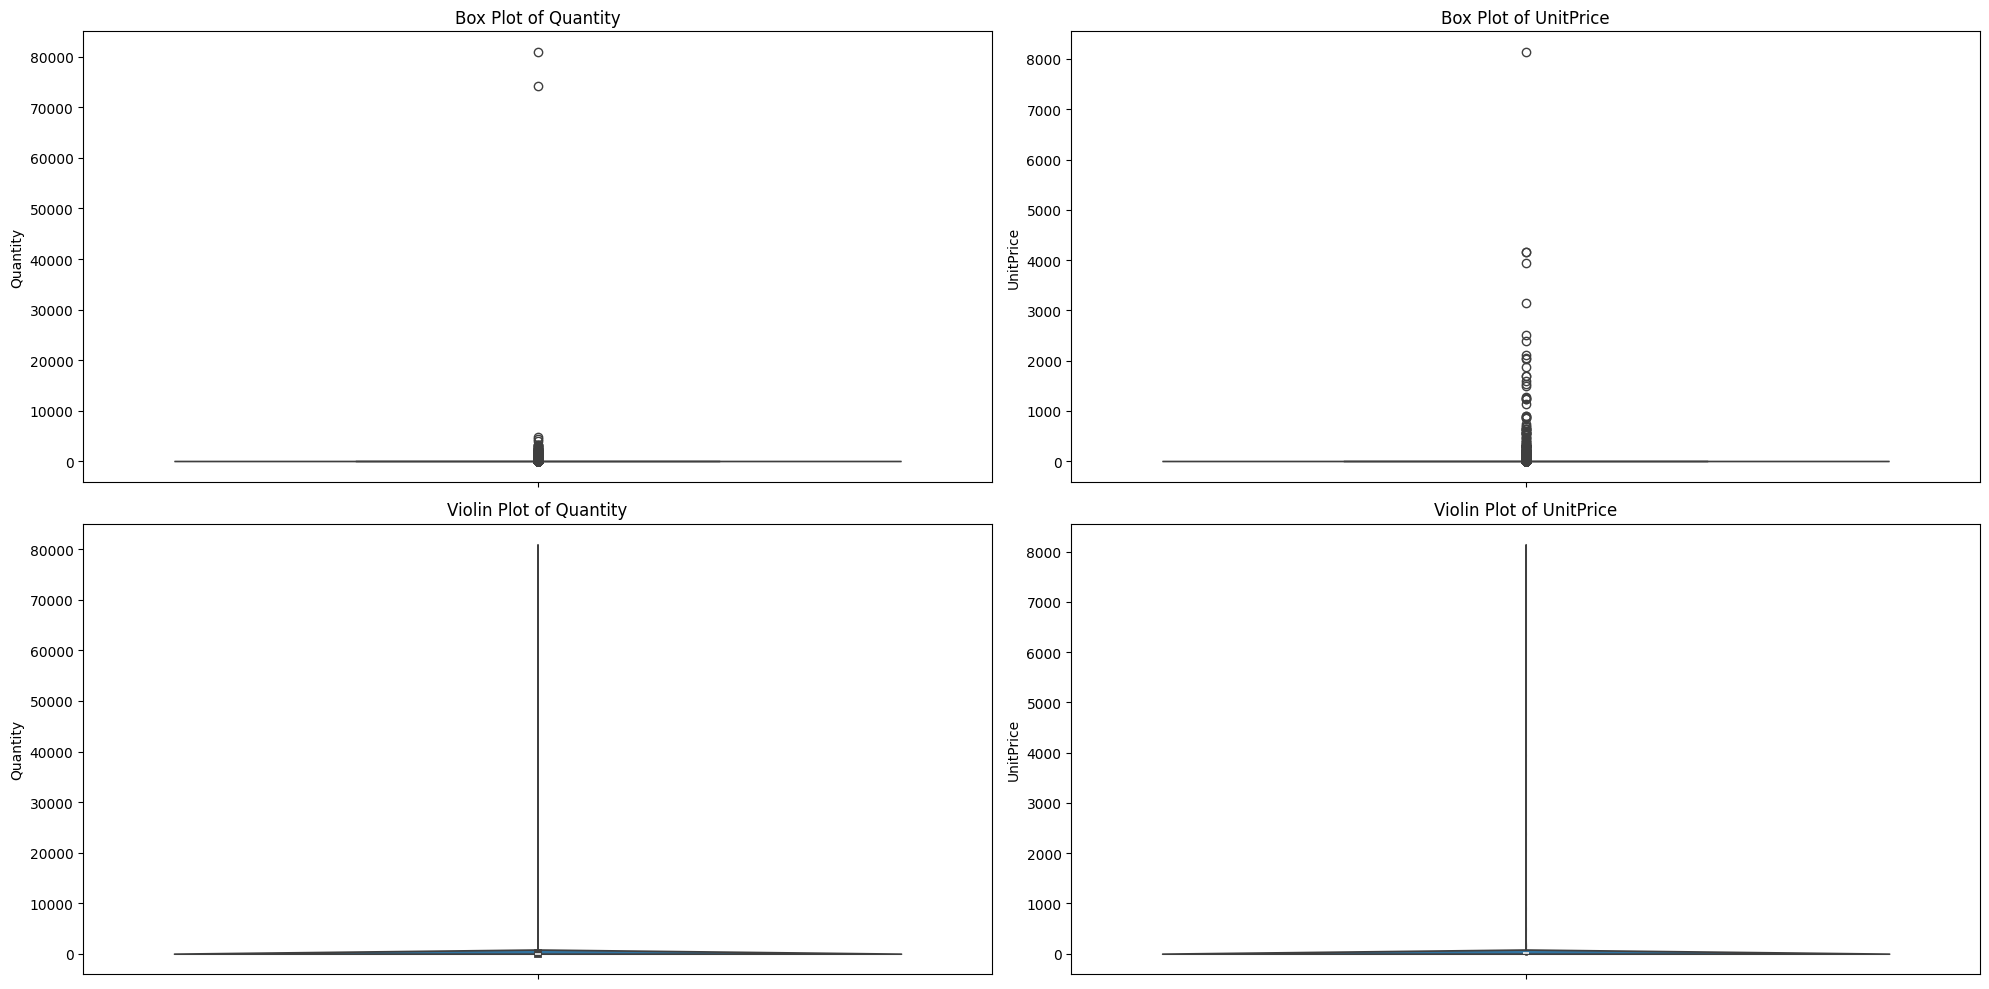

In [9]:

fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Box plot for Quantity
sns.boxplot(y=df['Quantity'], ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of Quantity')

# Box plot for UnitPrice
sns.boxplot(y=df['UnitPrice'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of UnitPrice')

# Violin plot for Quantity
sns.violinplot(y=df['Quantity'], ax=axs[1, 0])
axs[1, 0].set_title('Violin Plot of Quantity')

# Violin plot for UnitPrice
sns.violinplot(y=df['UnitPrice'], ax=axs[1, 1])
axs[1, 1].set_title('Violin Plot of UnitPrice')
plt.tight_layout()
plt.show()

In [10]:

# Function to remove outliers
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    df_clean = df.loc[(df[col_name] > fence_low) & (df[col_name] < fence_high)]
    return df_clean

# Remove outliers from Quantity and UnitPrice
df = remove_outliers(df, 'Quantity')
df = remove_outliers(df, 'UnitPrice')


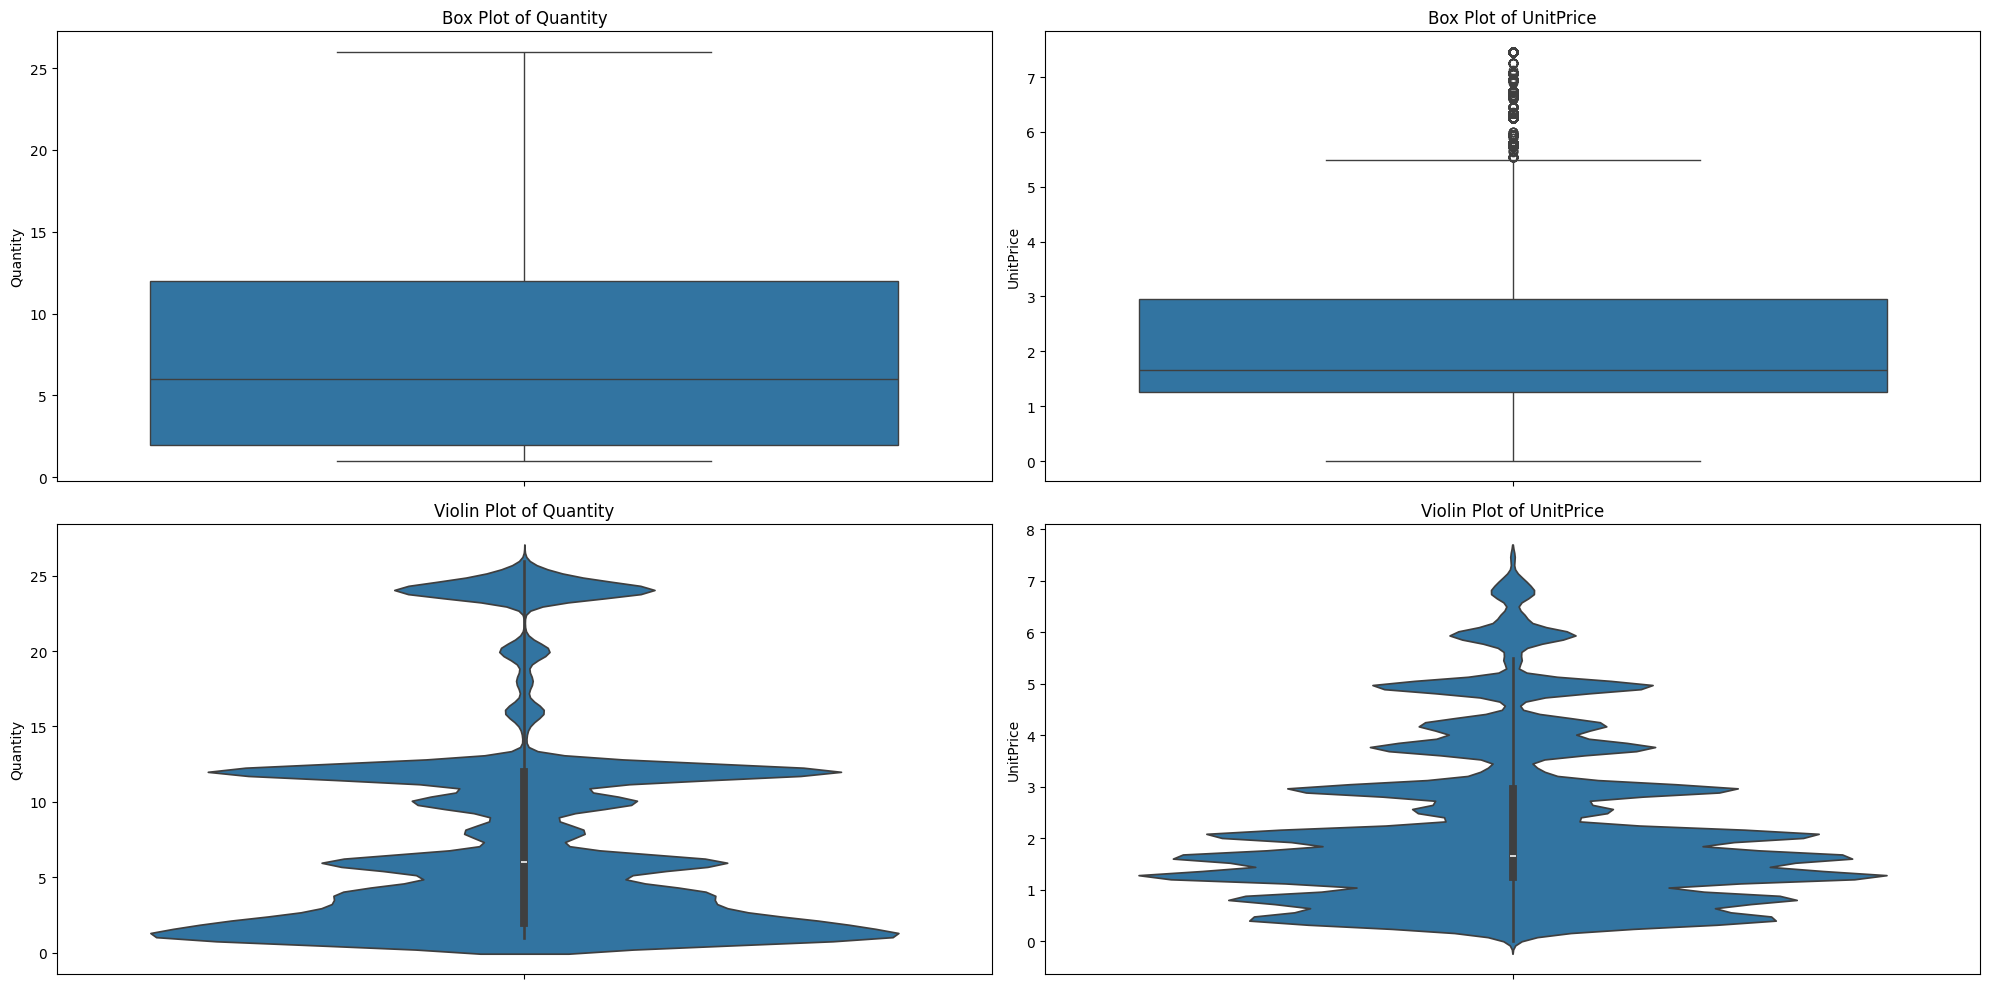

In [11]:
#Displaying the data after removing outliers.
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Box plot for Quantity
sns.boxplot(y=df['Quantity'], ax=axs[0, 0])
axs[0, 0].set_title('Box Plot of Quantity')

# Box plot for UnitPrice
sns.boxplot(y=df['UnitPrice'], ax=axs[0, 1])
axs[0, 1].set_title('Box Plot of UnitPrice')

# Violin plot for Quantity
sns.violinplot(y=df['Quantity'], ax=axs[1, 0])
axs[1, 0].set_title('Violin Plot of Quantity')

# Violin plot for UnitPrice
sns.violinplot(y=df['UnitPrice'], ax=axs[1, 1])
axs[1, 1].set_title('Violin Plot of UnitPrice')

plt.tight_layout()
plt.show()

In [13]:
df.shape

(337527, 8)

How many customers and countries are in the dataset?

In [14]:

"CustomerID: ",len(df['CustomerID'].unique()) ,"Country: ",len(df['Country'].unique())


('CustomerID: ', 4190, 'Country: ', 37)

In [16]:
customer_Country = df[['CustomerID', 'Country']].drop_duplicates(subset='CustomerID')
customer_Country

,CustomerID,Country
0,17850.0,United Kingdom
10,13047.0,United Kingdom
26,12583.0,France
86,14688.0,United Kingdom
105,17809.0,United Kingdom
...,...,...
536969,13436.0,United Kingdom
537255,15520.0,United Kingdom
538064,13298.0,United Kingdom
538812,14569.0,United Kingdom


Step 2 Feature Engineering

In [17]:
#Order frequency
df['OrderFrequency'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')

#Total spending
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']

#Recency of purchase
latest_date = df['InvoiceDate'].max()
df['Recency'] = latest_date - df.groupby('CustomerID')['InvoiceDate'].transform('max')
df['Recency'] = df['Recency'].dt.days  

# basket size
df['BasketSize'] = df.groupby(['CustomerID', 'InvoiceNo'])['Quantity'].transform('sum')
df = df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'])  

#Aggregation, for consolidated view of customer behavior. most improtant step
df = df.groupby('CustomerID').agg({
    'Recency': 'min',
    'OrderFrequency': 'mean',
    'TotalSpending': 'sum',
    'BasketSize': 'mean'
}).reset_index()
df

,CustomerID,Recency,OrderFrequency,TotalSpending,BasketSize
0,12347.0,1,7.0,163.16,270.428571
1,12348.0,248,3.0,50.60,46.666667
2,12349.0,18,1.0,17.70,521.000000
3,12350.0,309,1.0,25.20,196.000000
4,12352.0,35,7.0,135.30,71.428571
...,...,...,...,...,...
4185,18280.0,277,1.0,15.30,40.000000
4186,18281.0,180,1.0,5.04,52.000000
4187,18282.0,7,2.0,24.34,25.500000
4188,18283.0,3,16.0,53.69,87.062500


 Step 3 Apply PCA
 

We need to determine the optimal number of PCA components using plots.

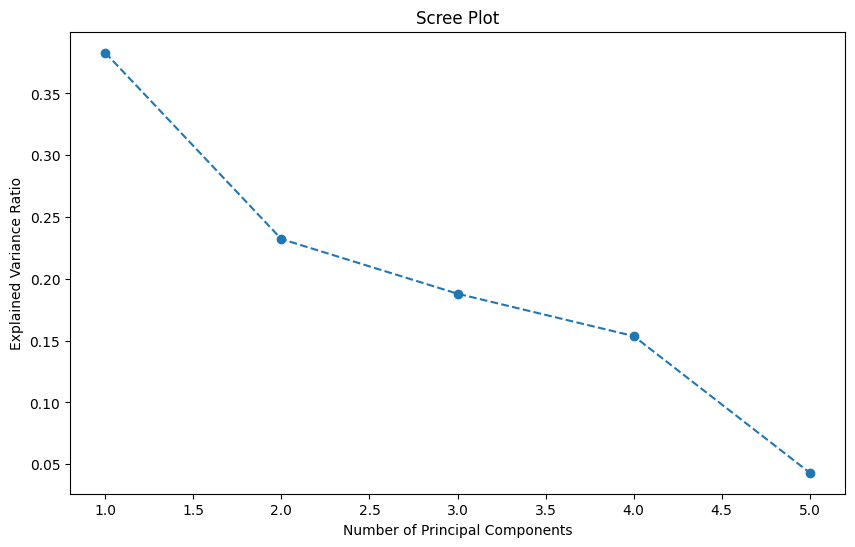

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# first we scal the data
df_copy=df.copy()
scaler = StandardScaler()
df_copy = scaler.fit_transform(df_copy)
#------------------------------
pca = PCA()
pca.fit(df_copy)
#---------------------
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

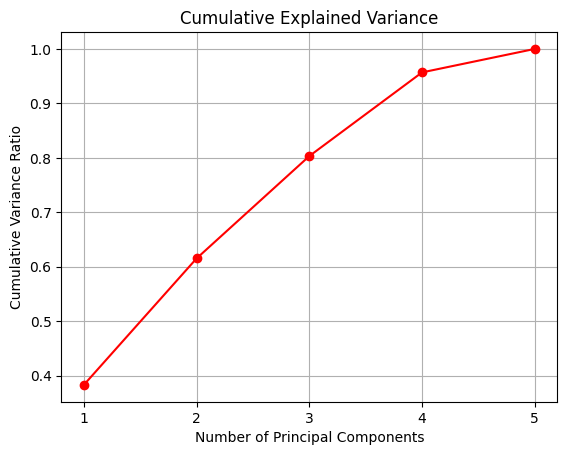

In [19]:
import numpy as np
xplained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
# Cumulative explained variance plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.xticks(np.arange(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.show()

Based on the plots, the optimal choice is 4 components.

In [21]:

pca = PCA(n_components=4)
pca_result = pca.fit_transform(df_copy)


Step 4 Determining Optimal Number of Clusters

In [28]:
from sklearn.cluster import KMeans
list_of_inirtias =[]
for i in range(1,10):
    km =KMeans(n_clusters=i)
    predictions=km.fit_predict(pca_result)
    list_of_inirtias.append(km.inertia_)
    print(i,">>",km.inertia_)

1 >> 20046.388301164476
2 >> 16749.674139855735
3 >> 13832.235964920323
4 >> 11538.328359563542
5 >> 8661.783261880082
6 >> 7126.048454920122
7 >> 6634.548248088375
8 >> 5762.854599833743
9 >> 5234.277392798253


Based on the plots, the optimal choice is 6 Clusters.

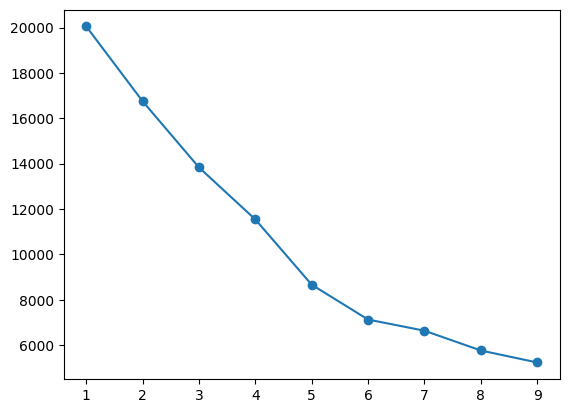

In [29]:
plt.plot(range(1,10),list_of_inirtias, marker='o')

Step 5 K-means Clustering

In [31]:

#.K-means Clustering
kmeans = KMeans(n_clusters=6)
df['Cluster'] = kmeans.fit_predict(pca_result)




 Analyzing the clusters to interprt the characteristics of each customer segment:

We see that each customer segment exhibits unique attributes that distinguish them from others, highlighting distinct characteristics within the dataset.

In [32]:
# Analyze the characteristics of each cluster
cluster_centers = kmeans.cluster_centers_
# Optionally, you can print cluster centers or perform further analysis
print("Cluster Centers:")
print(cluster_centers)

Cluster Centers:
[[ 3.05581942 -0.29024282  0.22891986  0.16553776]
 [ 0.07603178  0.59815598  0.29411551 -0.70405823]
 [-0.03294397 -0.53490633 -0.8630695  -0.03931925]
 [15.65067796 -1.86195594  3.35783966  3.21860507]
 [-1.05584376 -0.58441931  1.05984567  0.77019267]
 [-0.1284848   2.50501045 -0.73497357  1.2506474 ]]


In [33]:

df.groupby('Cluster').agg({
    'Recency': 'mean',            
    'OrderFrequency': 'mean',    
    'TotalSpending': 'mean',     
    'BasketSize': 'mean',        
}).reset_index()


,Cluster,Recency,OrderFrequency,TotalSpending,BasketSize
0,0,14.185345,17.724138,471.264784,135.846190
1,1,47.871832,3.431571,65.619392,142.186244
2,2,48.008868,3.452933,56.349686,134.596990
3,3,1.750000,88.500000,2005.445000,116.950313
4,4,259.035388,1.446347,26.027089,103.645403
5,5,75.044843,2.591928,44.017623,535.878917


step 6 Cluster Profiling

The plot consists of four subplots, each depicting the average metrics 
for different clusters identified in the customer segmentation analysis. 
The clusters are labeled from 0 to 5 and are represented by different colors.

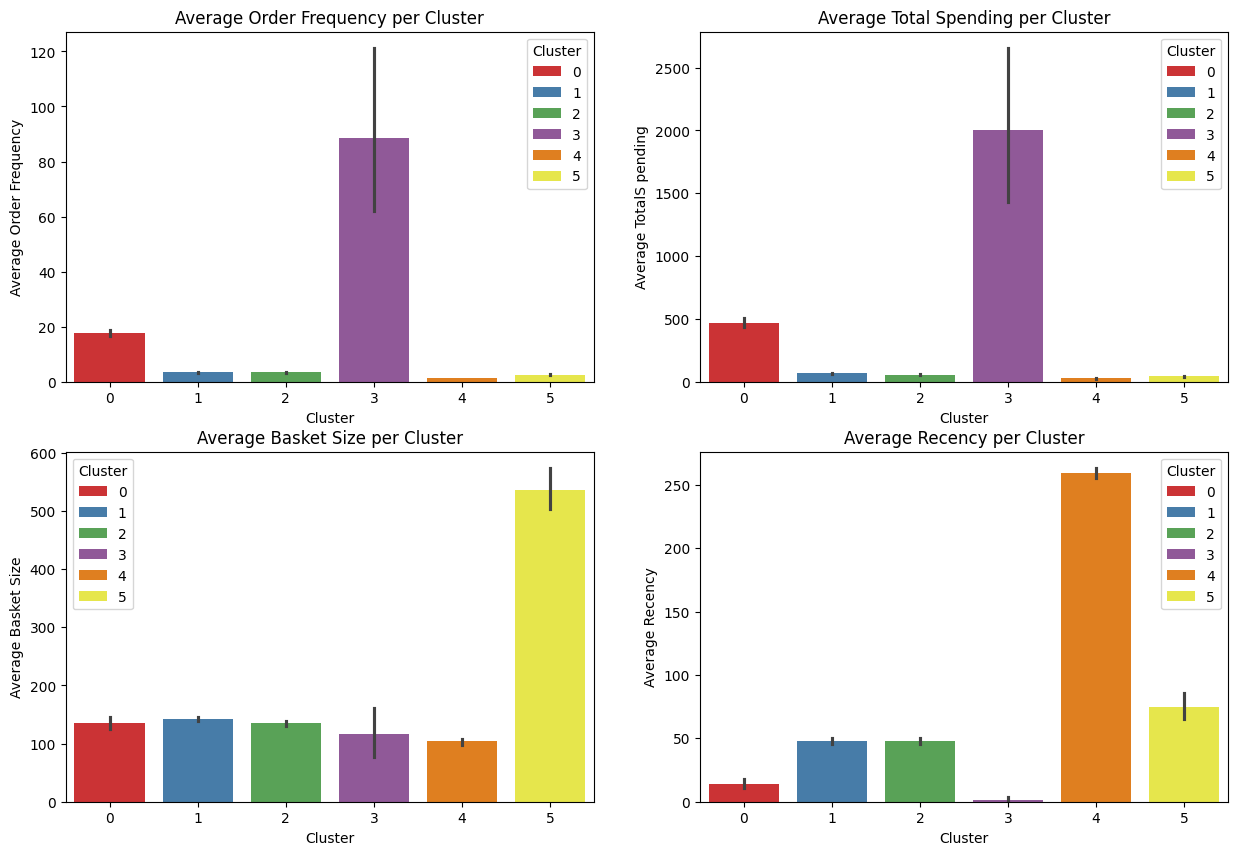

In [34]:
# Creating the figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Average OrderFrequency per Cluster
sns.barplot(ax=axes[0, 0], x='Cluster', y='OrderFrequency', data=df,palette='Set1', hue='Cluster')
axes[0, 0].set_title('Average Order Frequency per Cluster')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Average Order Frequency')

# Plot 2: Average TotalSpending per Cluster
sns.barplot(ax=axes[0, 1], x='Cluster', y='TotalSpending', data=df,palette='Set1', hue='Cluster')
axes[0, 1].set_title('Average Total Spending per Cluster')
axes[0, 1].set_xlabel('Cluster')
axes[0, 1].set_ylabel('Average TotalS pending')

# Plot 3: Average BasketSize per Cluster
sns.barplot(ax=axes[1, 0], x='Cluster', y='BasketSize', data=df,palette='Set1', hue='Cluster')
axes[1, 0].set_title('Average Basket Size per Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Basket Size')

# Plot 4: Average Recency per Cluster
sns.barplot(ax=axes[1, 1], x='Cluster', y='Recency', data=df,palette='Set1', hue='Cluster')
axes[1, 1].set_title('Average Recency per Cluster')
axes[1, 1].set_xlabel('Cluster')
axes[1, 1].set_ylabel('Average Recency')


# Display the plots
plt.show()

In [35]:
data = pd.DataFrame(df.merge(customer_Country, on='CustomerID'))
data.shape


(4190, 7)

In [36]:
data.columns

Index(['CustomerID', 'Recency', 'OrderFrequency', 'TotalSpending',
       'BasketSize', 'Cluster', 'Country'],
      dtype='object')

C:\Users\abdul\AppData\Local\Temp\ipykernel_21016\2386252540.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Country'].replace('Unspecified', pd.NA, inplace=True)


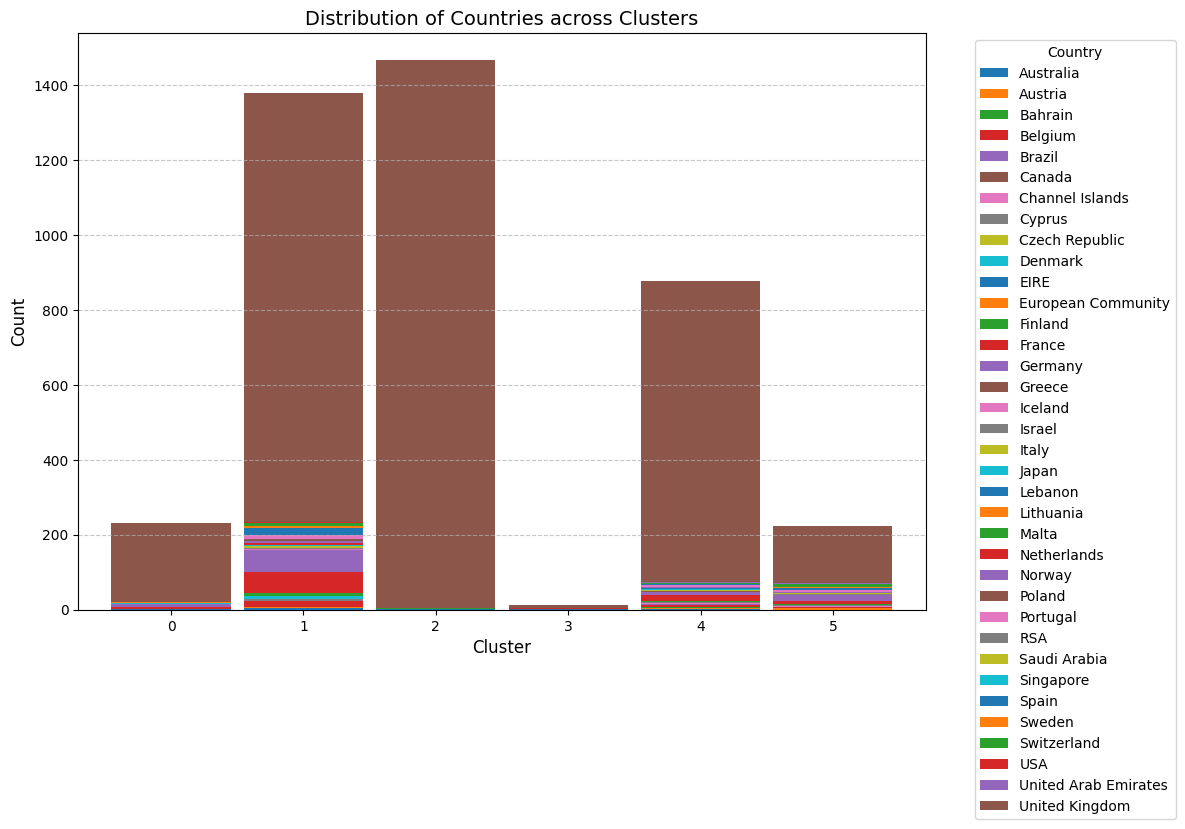

In [37]:
# Replace 'Unspecified' with NaN to exclude them from plotting
data['Country'].replace('Unspecified', pd.NA, inplace=True)

# Count the occurrences of each country within each cluster
country_counts = data.groupby(['Cluster', 'Country']).size().unstack(fill_value=0)

# Plotting
country_counts.plot(kind='bar', stacked=True, figsize=(12, 8), width=0.9)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Countries across Clusters', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Step 7 Visualization 

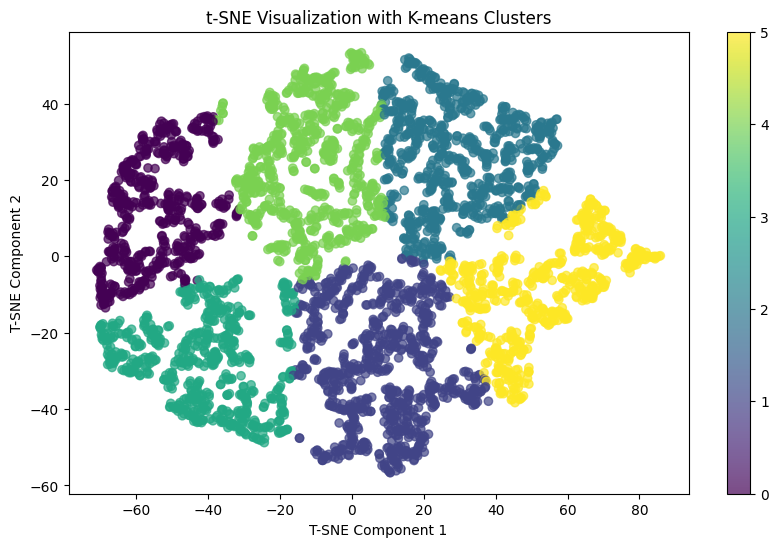

In [38]:
# Visualize the clusters in the 2D t-SNE space

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(pca_result)
df['T-SNE1'] = tsne_result[:, 0]
df['T-SNE2'] = tsne_result[:, 1]
#.K-means Clustering
kmeans = KMeans(n_clusters=6)
clusters=kmeans.fit_predict(tsne_result)

plt.figure(figsize=(10, 6))
plt.scatter(df['T-SNE1'], df['T-SNE2'], c= clusters, cmap='viridis', alpha=0.7)
plt.title('t-SNE Visualization with K-means Clusters')
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.colorbar()
plt.show()



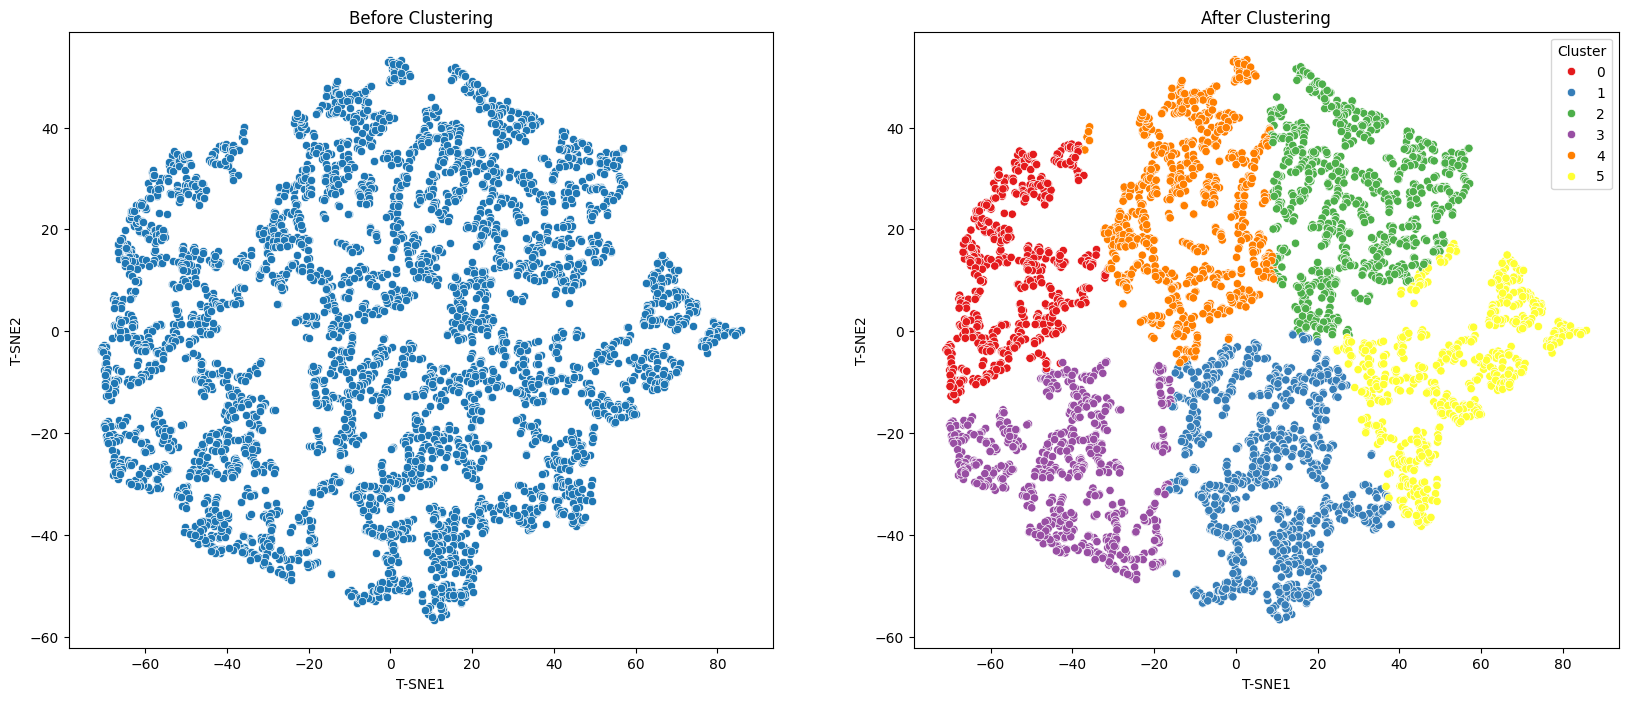

In [39]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Scatter plot before clustering
sns.scatterplot(x='T-SNE1', y='T-SNE2', data=df, ax=axes[0])
axes[0].set_title('Before Clustering')
axes[0].set_xlabel('T-SNE1')
axes[0].set_ylabel('T-SNE2')

# Scatter plot after clustering
sns.scatterplot(x='T-SNE1', y='T-SNE2', hue= clusters, data=df, palette='Set1', ax=axes[1])
axes[1].set_title('After Clustering')
axes[1].set_xlabel('T-SNE1')
axes[1].set_ylabel('T-SNE2')
axes[1].legend(title='Cluster', loc='upper right')

# Display the plots
plt.show()

Step 8 Evaluation: Assess the clustering quality

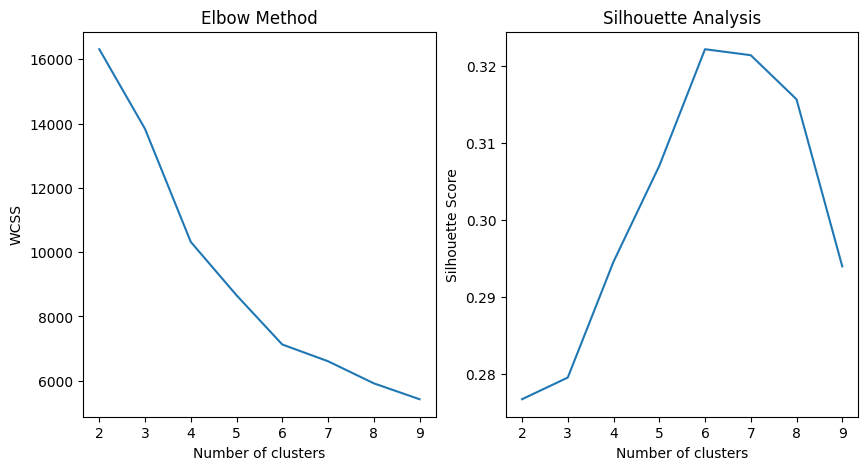

In [46]:
from sklearn.metrics import silhouette_score
wcss = []
silhouette_scores = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(pca_result, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2,10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.show()


In [47]:
silhouette_avg = silhouette_score(pca_result, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.32220714170945314


Step 9 Personalization and Recommendations:


Personalized Marketing Strategies

Cluster 0: Low Frequency, Low Spending, Low Recency, Moderate Basket Size.

Reactivation Offers: Special discounts and time-limited deals.
Educational Content: Product guides and benefits.


Cluster 1: Low Frequency, Low Spending, High Recency, Moderate Basket Size

Engagement Incentives: Loyalty points and small discounts.
New Product Alerts: Inform about new collections.

Cluster 2: Low Frequency, Low Spending, Moderate Recency, Moderate Basket Size.

Cross-Selling: Complementary product recommendations and bundle offers.
Feedback: Encourage survey participation.


Cluster 3: High Frequency, High Spending, Low Recency, Moderate Basket Size.

Exclusive Offers: VIP discounts and early access.
Personalized Recommendations: Suggest premium products.

Cluster 4: Low Frequency, Low Spending, High Basket Size, Moderate Recency.

Upselling: Recommend higher-value products and bundles.
Premium Promotions: Highlight premium items.

Cluster 5: Moderate Frequency, Moderate Spending, Low Recency, Moderate Basket Size.

Loyalty Programs: Points or rewards for purchases.


Special Discounts: Holiday and event discounts with personalized messages.
These strategies aim to boost engagement and satisfaction tailored to each customer segment.

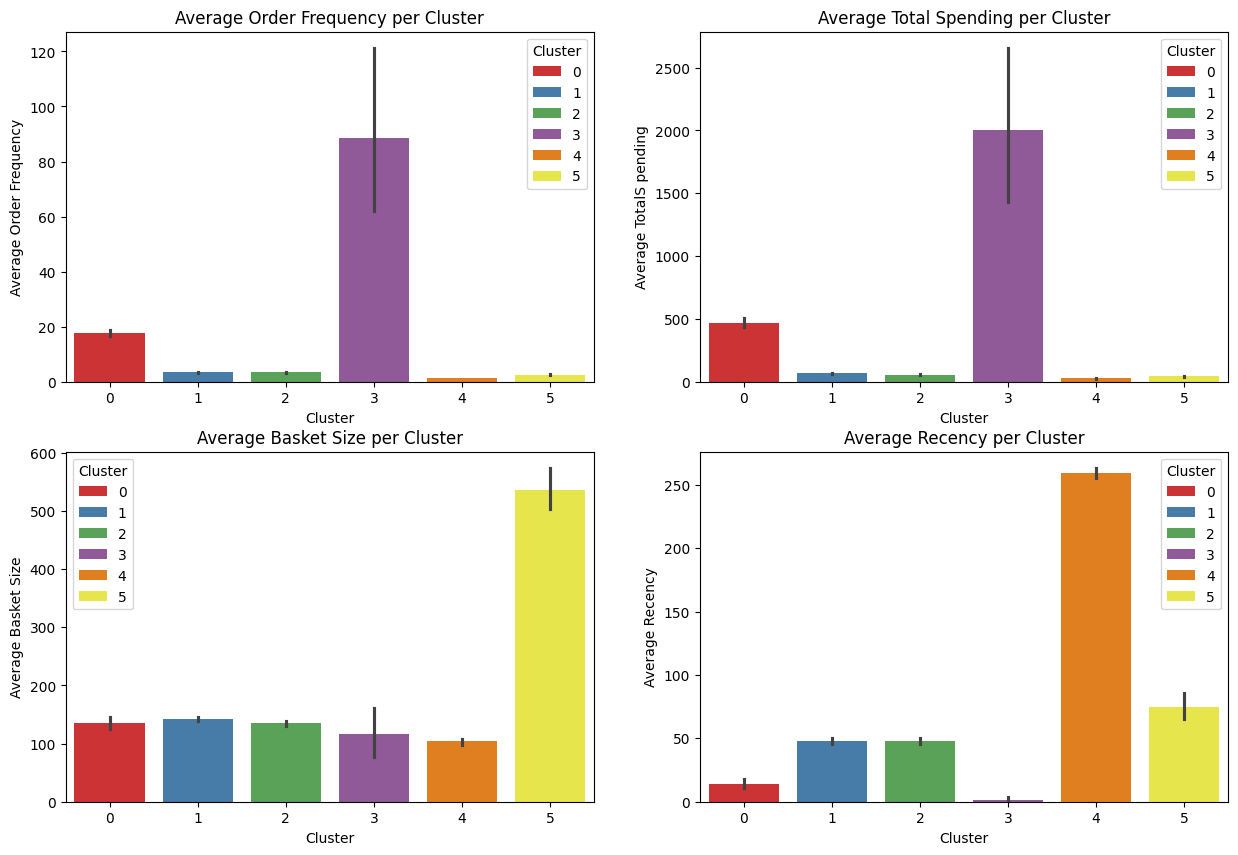

Step 10 :Interpretation and Insights:


The customer segmentation reveals distinct behaviors across clusters, emphasizing the need for personalized marketing strategies. Addressing these variations with targeted recommendations will boost sales and revenue.Additionally, it optimizes inventory management by accurately forecasting demand based on segment behaviors. We must consider each group's behavior to take the most effective actions. Moreover, further studies on the clusters are necessary to understand customer behavior better, helping the organization gain both revenue and reputation.